In [142]:
import pandas as pd
import numpy as np
import plotly.express as px

In [143]:
df = pd.read_csv("train_ctrUa4K.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [145]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [146]:
df.duplicated().sum()

0

In [147]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [148]:
df.dropna(inplace=True)

In [149]:
df.reset_index(drop = True , inplace = True)

#### Univariate Analysis

In [150]:
df["Gender"].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [151]:
px.bar(data_frame=df,x='Gender',)

In [152]:
df['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 48.9+ KB


In [154]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [155]:
# fanction to convert +3 to 3 
def fix_Dependents (r):
    if r in ['3+']:
        return '3'
    
    else:
        return r 

In [156]:
df['Dependents']= df['Dependents'].apply(fix_Dependents)

In [157]:
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [158]:
df['Dependents']= df['Dependents'].astype(int)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    int32  
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 47.0+ KB


In [160]:
df['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [161]:
df['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [162]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [163]:
df['ApplicantIncome'].describe()

count      480.000000
mean      5364.231250
std       5668.251251
min        150.000000
25%       2898.750000
50%       3859.000000
75%       5852.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [164]:
df['ApplicantIncome'] = df['ApplicantIncome'].apply(lambda x : x/1000 )

In [165]:
px.box(data_frame=df,x='ApplicantIncome')

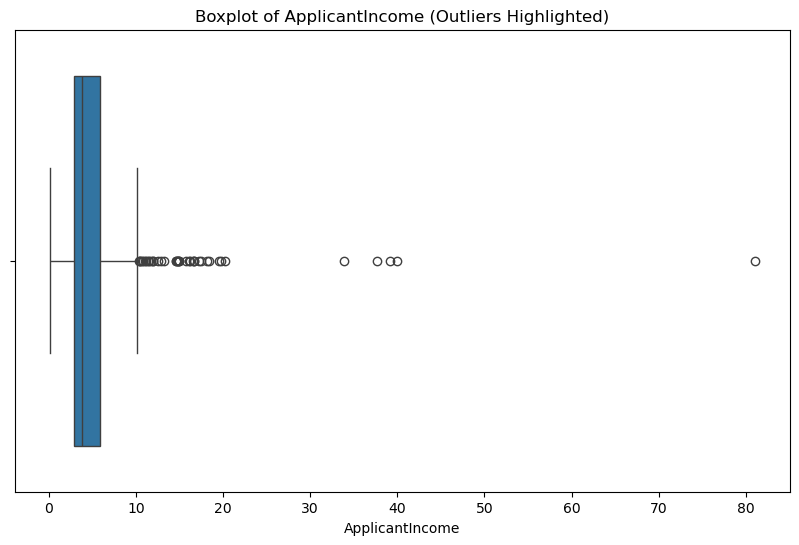

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the outliers in the 'ApplicantIncome' column using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ApplicantIncome'])
plt.title('Boxplot of ApplicantIncome (Outliers Highlighted)')
plt.xlabel('ApplicantIncome')
plt.show()


In [167]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].apply(lambda x : x/1000 )

In [168]:
px.box(data_frame=df,x='CoapplicantIncome')

In [169]:
px.histogram(data_frame=df,x='CoapplicantIncome')

In [170]:
df['LoanAmount'].describe()

count    480.000000
mean     144.735417
std       80.508164
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      600.000000
Name: LoanAmount, dtype: float64

In [171]:
px.box(data_frame=df,x='LoanAmount')

In [172]:
px.histogram(data_frame=df,x='LoanAmount')

In [173]:
df['Loan_Amount_Term'].value_counts(ascending=False)

360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64

In [174]:
df['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    int32  
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    float64
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(5), int32(1), object(7)
memory usage: 47.0+ KB


In [176]:
count_Property_Area = df['Property_Area'].value_counts()
count_Property_Area

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [177]:
px.bar(data_frame=count_Property_Area,text_auto=True)

In [178]:
df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    int32  
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    float64
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(5), int32(1), object(7)
memory usage: 47.0+ KB


# handel outliers

In [180]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    # Calculate Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    # Detect outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [181]:
# Define a function to Remove outliers column using the IQR method
def remove_outliers_iqr(data, column):
    # Calculate Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    # Filter the dataset to remove outliers
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [182]:
# Apply the function to detect outliers the 'ApplicantIncome' column
outliers_applicant_income = detect_outliers_iqr(df, 'ApplicantIncome')
outliers_applicant_income
num_outliers = len(outliers_applicant_income)
# Print the number of outliers
print(f"Number of outliers in ApplicantIncome: {num_outliers}")

Number of outliers in ApplicantIncome: 22


In [183]:
# Apply the function to remove outliers from the 'ApplicantIncome' column
df_no_outliers = remove_outliers_iqr(df, 'ApplicantIncome')

In [184]:
# Display the cleaned dataset
df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            458 non-null    object 
 1   Gender             458 non-null    object 
 2   Married            458 non-null    object 
 3   Dependents         458 non-null    int32  
 4   Education          458 non-null    object 
 5   Self_Employed      458 non-null    object 
 6   ApplicantIncome    458 non-null    float64
 7   CoapplicantIncome  458 non-null    float64
 8   LoanAmount         458 non-null    float64
 9   Loan_Amount_Term   458 non-null    float64
 10  Credit_History     458 non-null    float64
 11  Property_Area      458 non-null    object 
 12  Loan_Status        458 non-null    object 
dtypes: float64(5), int32(1), object(7)
memory usage: 48.3+ KB


In [185]:
df_no_outliers.head().reset_index(drop=True, inplace=True)

In [186]:
# Apply the function to detect outliers the 'CoapplicantIncome' column
outliers_CoapplicantIncome= detect_outliers_iqr(df_no_outliers, 'CoapplicantIncome')
outliers_CoapplicantIncome
num_outliers = len(outliers_CoapplicantIncome)
# Print the number of outliers
print(f"Number of outliers in CoapplicantIncome: {num_outliers}")


Number of outliers in CoapplicantIncome: 5


In [187]:
# Apply the function to remove outliers from the 'CoapplicantIncome' column
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'CoapplicantIncome')

In [188]:
df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            453 non-null    object 
 1   Gender             453 non-null    object 
 2   Married            453 non-null    object 
 3   Dependents         453 non-null    int32  
 4   Education          453 non-null    object 
 5   Self_Employed      453 non-null    object 
 6   ApplicantIncome    453 non-null    float64
 7   CoapplicantIncome  453 non-null    float64
 8   LoanAmount         453 non-null    float64
 9   Loan_Amount_Term   453 non-null    float64
 10  Credit_History     453 non-null    float64
 11  Property_Area      453 non-null    object 
 12  Loan_Status        453 non-null    object 
dtypes: float64(5), int32(1), object(7)
memory usage: 47.8+ KB


 convert categury to integet to make some analysis 

In [189]:
df_to_analyis= df_no_outliers.copy()

In [190]:
df_to_analyis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            453 non-null    object 
 1   Gender             453 non-null    object 
 2   Married            453 non-null    object 
 3   Dependents         453 non-null    int32  
 4   Education          453 non-null    object 
 5   Self_Employed      453 non-null    object 
 6   ApplicantIncome    453 non-null    float64
 7   CoapplicantIncome  453 non-null    float64
 8   LoanAmount         453 non-null    float64
 9   Loan_Amount_Term   453 non-null    float64
 10  Credit_History     453 non-null    float64
 11  Property_Area      453 non-null    object 
 12  Loan_Status        453 non-null    object 
dtypes: float64(5), int32(1), object(7)
memory usage: 47.8+ KB


In [191]:
df_to_analyis['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [192]:
df_to_analyis['Gender'] = df_to_analyis['Gender'].map({'Male': 1, 'Female': 0})


In [193]:
df_to_analyis['Married'] = df_to_analyis['Married'].map({'Yes': 1, 'No': 0})


In [194]:
df_to_analyis['Education'] = df_to_analyis['Education'].map({'Graduate': 1, 'Not Graduate': 0})


In [195]:
df_to_analyis['Self_Employed'] = df_to_analyis['Self_Employed'].map({'Yes': 1, 'No': 0})


In [196]:
df_to_analyis['Property_Area'] = df_to_analyis['Property_Area'].map({'Urban': 2, 'Semiurban': 1 , 'Rural' : 0})


In [197]:
df_to_analyis['Loan_Status'] = df_to_analyis['Loan_Status'].map({'Y': 1, 'N': 0})


## bivariate / multivariate analysis

In [198]:
 # data relations
corr_= df_to_analyis.corr()
corr_


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14060\1907694992.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.354243,0.220162,-0.084717,0.032357,0.050321,0.188089,0.107623,-0.089116,0.039069,0.011903,0.094109
Married,0.354243,1.000000,0.373439,-0.017631,0.020166,0.005624,0.211902,0.181672,-0.107791,0.026901,0.048498,0.116758
Dependents,0.220162,0.373439,1.000000,-0.046327,0.060840,0.107601,0.007091,0.137563,-0.091946,-0.003089,0.014406,0.039584
Education,-0.084717,-0.017631,-0.046327,1.000000,0.008869,0.187029,0.065260,0.170456,0.102350,0.067572,0.061872,0.085819
Self_Employed,0.032357,0.020166,0.060840,0.008869,1.000000,0.202173,-0.012666,0.123158,-0.054469,-0.040645,-0.070226,-0.064254
ApplicantIncome,0.050321,0.005624,0.107601,0.187029,0.202173,1.000000,-0.177336,0.567923,-0.042598,0.051003,-0.031682,-0.015457
CoapplicantIncome,0.188089,0.211902,0.007091,0.065260,-0.012666,-0.177336,1.000000,0.343808,-0.039156,-0.037246,-0.061369,0.043649
LoanAmount,0.107623,0.181672,0.137563,0.170456,0.123158,0.567923,0.343808,1.000000,0.075355,0.010804,-0.107223,-0.011179
Loan_Amount_Term,-0.089116,-0.107791,-0.091946,0.102350,-0.054469,-0.042598,-0.039156,0.075355,1.000000,0.021741,-0.061917,-0.000527
Credit_History,0.039069,0.026901,-0.003089,0.067572,-0.040645,0.051003,-0.037246,0.010804,0.021741,1.000000,-0.005729,0.539362


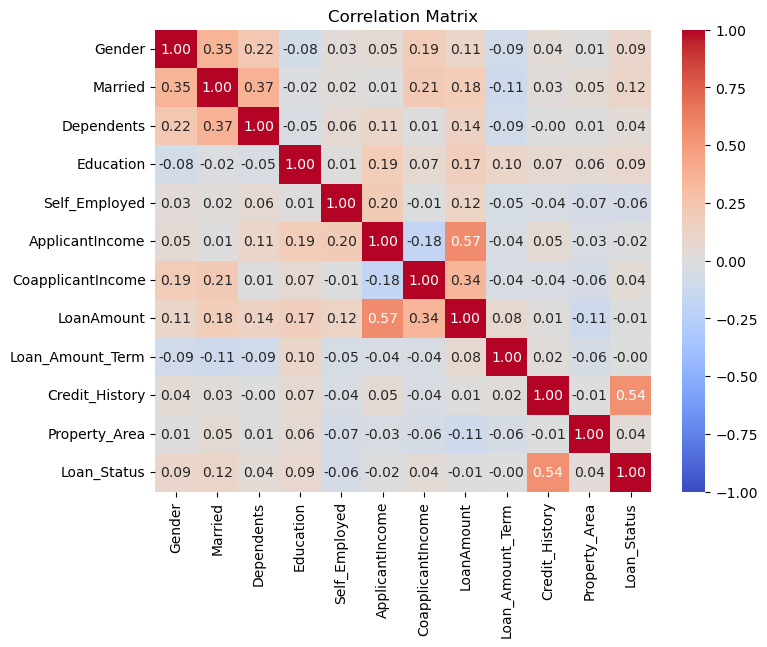

In [199]:
# Plot the  correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [200]:
# the relation between ApplicantIncome and LoanAmount
px.scatter(df_to_analyis,x='ApplicantIncome',y='LoanAmount')

In [201]:
# the relation between gender and LoanAmount
px.scatter(df_to_analyis,x='Gender',y='LoanAmount')


In [202]:
# the relation between gender and loan status
px.scatter(df_to_analyis,x='Credit_History',y='Loan_Status')

# machien learning models

In [203]:
df_clean= df_no_outliers.copy()

In [204]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            453 non-null    object 
 1   Gender             453 non-null    object 
 2   Married            453 non-null    object 
 3   Dependents         453 non-null    int32  
 4   Education          453 non-null    object 
 5   Self_Employed      453 non-null    object 
 6   ApplicantIncome    453 non-null    float64
 7   CoapplicantIncome  453 non-null    float64
 8   LoanAmount         453 non-null    float64
 9   Loan_Amount_Term   453 non-null    float64
 10  Credit_History     453 non-null    float64
 11  Property_Area      453 non-null    object 
 12  Loan_Status        453 non-null    object 
dtypes: float64(5), int32(1), object(7)
memory usage: 47.8+ KB


In [205]:
df_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4.583,1.508,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3.000,0.000,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2.583,2.358,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6.000,0.000,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5.417,4.196,267.0,360.0,1.0,Urban,Y


In [206]:
df_clean.drop('Loan_ID',axis=1,inplace=True)

In [207]:
df_clean['Loan_Status']= df_clean['Loan_Status'].map({'N': 0, 'Y': 1})


In [208]:
x= df_clean.drop('Loan_Status',axis=1)
y= df_clean['Loan_Status']

In [209]:
df_clean.to_csv('dfqqqq.csv')

In [210]:
print(x.columns)  # Ensure 'Loan_Status' is not in x


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [211]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , RobustScaler , StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [212]:
Cat_Columns = df_clean.select_dtypes(include="object_")
Cat_Columns.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

In [213]:
for col in Cat_Columns.columns:
    print(f"Col {col} has {df_clean[col].nunique()} different values")

Col Gender has 2 different values
Col Married has 2 different values
Col Education has 2 different values
Col Self_Employed has 2 different values
Col Property_Area has 3 different values


In [214]:
Encoder = ColumnTransformer(transformers=[("BE",BinaryEncoder(),[ 'Gender', 'Married', 'Education', 'Self_Employed','Property_Area'])  ] , remainder="passthrough")

In [215]:
steps= []
steps.append(('Encoder',Encoder))
steps.append(('Scaler' , StandardScaler()))
steps.append(('Model',LogisticRegression()))
pipeline = Pipeline(steps=steps)

In [216]:
result = cross_validate(pipeline , x ,y , cv = 5 , scoring="accuracy" , return_train_score=True)

In [217]:
result['train_score'].mean()

0.8123738642071137

In [218]:
result['test_score'].mean()

0.8036874236874236

In [219]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from xgboost import XGBClassifier

In [220]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB  # GaussianNB is for classification, we'll remove this.
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate

In [221]:
models= []
models.append(('LR',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('XGB',XGBClassifier()))
models.append(("SVM" , SVC()))


In [222]:
for model in models:
    steps= []
    steps.append(('Encoder', Encoder))
    steps.append(('Scaler', StandardScaler()))
    steps.append(model)
    pipeline= Pipeline(steps = steps)
    result = cross_validate(pipeline ,x , y, cv = 5 , scoring = "accuracy" , return_train_score=True)

    print(f"{model[0]} Average Train accuracy is {result['train_score'].mean()}")
    print(f"{model[0]} Average Test accuracy is {result['test_score'].mean() } \n")


LR Average Train accuracy is 0.8123738642071137
LR Average Test accuracy is 0.8036874236874236 

DT Average Train accuracy is 1.0
DT Average Test accuracy is 0.721978021978022 

RF Average Train accuracy is 1.0
RF Average Test accuracy is 0.7903296703296704 

GNB Average Train accuracy is 0.7958175425779646
GNB Average Test accuracy is 0.7748962148962149 

XGB Average Train accuracy is 1.0
XGB Average Test accuracy is 0.7903296703296704 

SVM Average Train accuracy is 0.8327854131470405
SVM Average Test accuracy is 0.8036385836385836 



In [223]:
steps= []
steps.append(('Encoder',Encoder))
steps.append(('Scaler' , StandardScaler()))
steps.append(('Model', SVC() ))
pipeline = Pipeline(steps=steps)

In [224]:
from sklearn.model_selection import GridSearchCV

In [225]:
# Set up a parameter grid for hyperparameter tuning
param_grid = {
    'Model__C': [0.1, 1, 10, 100],  # Regularization parameter
    'Model__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Kernel coefficient
    'Model__kernel': ['rbf', 'linear', 'poly']  # Types of kernel
}

In [226]:
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, return_train_score=True)


In [227]:
result = grid.fit(x,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [228]:
# Get the best parameters and the best score
best_params = grid.best_params_
best_score = grid.best_score_


In [229]:
# Displaying the results
result_dict = {
    "Best Parameters": [best_params],
    "Best Cross-Validation Score": [best_score]
}

results_df = pd.DataFrame(result_dict)
results_df

,Best Parameters,Best Cross-Validation Score
0,"{'Model__C': 0.1, 'Model__gamma': 'scale', 'Mo...",0.814725


In [230]:
result.cv_results_["mean_train_score"]

array([0.70033484, 0.81457924, 0.76820845, 0.70033484, 0.81457924,
       0.76820845, 0.69757241, 0.81457924, 0.83499231, 0.69757241,
       0.81457924, 0.69757241, 0.69757241, 0.81457924, 0.69757241,
       0.83278541, 0.81457924, 0.85927279, 0.83278541, 0.81457924,
       0.85927279, 0.85486203, 0.81457924, 0.89845974, 0.81457924,
       0.81457924, 0.69757241, 0.69757241, 0.81457924, 0.69757241,
       0.91280459, 0.81457924, 0.92273869, 0.91280459, 0.81457924,
       0.92273869, 0.93211725, 0.81457924, 0.93653258, 0.81733711,
       0.81457924, 0.7135732 , 0.81457924, 0.81457924, 0.69757241,
       0.95253946, 0.81457924, 0.94977855, 0.95253946, 0.81457924,
       0.94977855, 0.96743984, 0.81457924, 0.96578391, 0.86699998,
       0.81457924, 0.83499231, 0.81457924, 0.81457924, 0.69757241])

In [231]:
result.cv_results_["mean_test_score"]

array([0.69978022, 0.81472527, 0.7417094 , 0.69978022, 0.81472527,
       0.7417094 , 0.69758242, 0.81472527, 0.79032967, 0.69758242,
       0.81472527, 0.69758242, 0.69758242, 0.81472527, 0.69758242,
       0.80363858, 0.81472527, 0.78815629, 0.80363858, 0.81472527,
       0.78815629, 0.80361416, 0.81472527, 0.75941392, 0.81472527,
       0.81472527, 0.69758242, 0.69758242, 0.81472527, 0.69758242,
       0.74612943, 0.81472527, 0.75721612, 0.74612943, 0.81472527,
       0.75721612, 0.74840049, 0.81472527, 0.73501832, 0.81250305,
       0.81472527, 0.71081807, 0.81472527, 0.81472527, 0.69758242,
       0.73279609, 0.81472527, 0.73050061, 0.73279609, 0.81472527,
       0.73050061, 0.69089133, 0.81472527, 0.69301587, 0.77929182,
       0.81472527, 0.79032967, 0.81472527, 0.81472527, 0.69758242])

In [232]:
result.best_index_

1

In [233]:
result.cv_results_["mean_test_score"][result.best_index_]

0.8147252747252747

In [234]:
result.cv_results_["mean_train_score"][result.best_index_]

0.8145792429569425

In [235]:
result.best_params_

{'Model__C': 0.1, 'Model__gamma': 'scale', 'Model__kernel': 'linear'}

In [236]:
Final_Model = result.best_estimator_

In [237]:
Final_Model.fit(x,y)

c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('BE', BinaryEncoder(),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('Scaler', StandardScaler()),
                ('Model', SVC(C=0.1, kernel='linear'))])

In [238]:
import joblib

In [239]:
joblib.dump(Final_Model , "Model.pkl" ,compress=3)
joblib.dump(x.columns , "Inputs.pkl")

['Inputs.pkl']

In [240]:
df_clean.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [241]:
#   streamlit run app.py

In [242]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [243]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

Model = joblib.load("Model.pkl")
Inputs = joblib.load("Inputs.pkl")

def Make_Prediciton(Gender, Married, Dependents, Education, Self_Employed,
       ApplicantIncome, CoapplicantIncome, LoanAmount,
       Loan_Amount_Term, Credit_History, Property_Area):
    pr_df = pd.DataFrame(columns = Inputs)
    pr_df.at[0 ,'Gender' ] = Gender 
    pr_df.at[0 , 'Married'] = Married
    pr_df.at[0 , 'Dependents'] = Dependents
    pr_df.at[0 ,'Education' ] = Education
    pr_df.at[0 , 'Self_Employed'] =Self_Employed
    pr_df.at[0 , 'ApplicantIncome' ] =ApplicantIncome
    pr_df.at[0 , 'CoapplicantIncome'] = CoapplicantIncome
    pr_df.at[0 , 'LoanAmount'] = LoanAmount
    pr_df.at[0 , 'Loan_Amount_Term'] = Loan_Amount_Term
    pr_df.at[0 , 'Credit_History'] = Credit_History
    pr_df.at[0 , 'Property_Area'] = Property_Area

    prediction = Model.predict(pr_df)
    return prediction[0]

def main():
    st.title("Loan_Approval Prediction")
    Gender = st.selectbox("Gender" , ['Male', 'Female'])
    Married = st.selectbox("Married" , ['Yes', 'No'])
    Dependents = st.selectbox("Dependents" ,[0 , 1 , 2 , 3] )
    Education = st.selectbox("Education" ,['Graduate', 'Not Graduate'] )
    Self_Employed = st.selectbox("Self_Employed" , ['No', 'Yes'])
    ApplicantIncome = st.slider("ApplicantIncome" ,  min_value=0, max_value=85, value=0, step=1)
    CoapplicantIncome = st.slider("CoapplicantIncome" ,  min_value=0, max_value=35, value=0, step=1)
    LoanAmount = st.slider("LoanAmount" ,  min_value=9, max_value=600, value=9, step=10)
    Loan_Amount_Term = st.slider("Loan_Amount_Term" ,  min_value=36, max_value=480, value=36, step=3)
    Credit_History = st.selectbox("Credit_History" ,[ 1., 0.] )
    Property_Area = st.selectbox("Property_Area" ,['Rural', 'Urban', 'Semiurban'] )

    if st.button("Predict")  :
        result = Make_Prediciton(Gender, Married, Dependents, Education, Self_Employed,
       ApplicantIncome, CoapplicantIncome, LoanAmount,
       Loan_Amount_Term, Credit_History, Property_Area)
        list_success = [ "N", "Y"]
        return st.text(f"Your Restaurant will {list_success[result]}")
main()

Overwriting app.py
